# 　　Build your `Recurrent Neural Network (RNN)` for Deep Learning
# 　　　　　　on Stock Price `Time-Series Forecasting` Task

## Task Overview 
<img src="https://svencarlin.com/wp-content/uploads/2020/02/bac-stock.png" width="500">
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　<strong>An Example Stock Chart</strong>
                                              
The Recurrent Neural Networks (RNNs) are in form of advanced neural networks which have internal memories that are capable of processing long sequences. This makes RNN very suitable for forecasting or predicting an outcome that relies on some form of historical context. The Time-series forecasting is to predict future values based on previously observed values in the time sequence. These all make the Stock Price Forecasting a fascinating application for RNN to work with its long historical data in the form of sequence of time.   

You will resolve a `Stock Price Forecasting` task, which is to predict the future value based on a sequence of previously observed values, by building an architecture of a `Recurrent Neural Network`(`RNN`), `implementing` with Python, and `training` your model on a set of time-series stock price data as a supervised learning procedure. Finally, you will `evaluate` your model's accuracy using test dataset.

The `TensorFlow 2.x` platform and its integrated version of `Keras API` (versus the traditional Keras Package) should be the handy tools for you to complete this task. Please take advantage of the official well supported TensorFlow & Keras [`Help Documentations`](https://www.tensorflow.org/api_docs/python/tf/keras) for correct usages of the API and functions. 


## Setup Development Environment

##### Import Modules/Packages 

In [1]:
## Import related Modules for TensorFlow framework and Keras API

import tensorflow as tf

from tensorflow import keras 

from tensorflow.keras import layers, optimizers  

import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt   

2023-07-06 17:38:25.897421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare Data

### The Stock Price data composition - Introduction 

Stock price data come in several different [flavors](https://analyzingalpha.com/open-high-low-close-stocks). They are:

- `Open`: Opening stock price at the beginning of the trading day
- `Close`: Closing stock price at the end of the trading day
- `High`: Highest stock price among the trading day
- `Low`: Lowest stock price among the trading day
- `Volume`: Total amount of trading activity 

The provided stock price data file contains the stock price data for **ONE** stock,             
It has a record **each trading day**, for **10 years** from `2011-05-18` until `2021-05-18`           
Erach record has these above mentioned attributes         .
 

***   *NOTE: weekends and holidays are not trading days.*




### Load Data

Load the provided stock price data

  

In [2]:
## The URL of provided data
DATA_URL = "https://tinyurl.com/StockDataCSV"

data = pd.read_csv(DATA_URL) 

###  Explore Data

In [3]:
data.shape  

(2428, 8)

In [4]:
## Display first five rows in the `data` 
data.head(5)

,Unnamed: 0,date,open,close,high,low,volume,code
0,88,2011-05-18,120.646,125.574,127.178,120.646,62165.0,600519
1,89,2011-05-19,126.250,128.749,129.889,126.250,85738.0,600519
2,90,2011-05-20,129.277,129.361,129.896,128.060,40043.0,600519
3,91,2011-05-23,128.827,126.913,130.598,126.894,39420.0,600519
4,92,2011-05-24,125.934,125.355,127.216,125.284,23997.0,600519


In [5]:
data.tail(5)

,Unnamed: 0,date,open,close,high,low,volume,code
2423,2511,2021-05-12,1949.08,1984.00,1999.00,1949.00,32699.0,600519
2424,2512,2021-05-13,1965.75,1971.50,1985.05,1953.00,25078.0,600519
2425,2513,2021-05-14,1982.00,2009.85,2030.50,1976.00,35611.0,600519
2426,2514,2021-05-17,2025.10,2057.96,2085.20,2025.10,44524.0,600519
2427,2515,2021-05-18,2065.00,2059.31,2077.00,2045.06,17504.0,600519


##### Display the chart of close price of this stock in 10 years span

Executing the below code to gain a whole picture of all cloding stock price from all records.

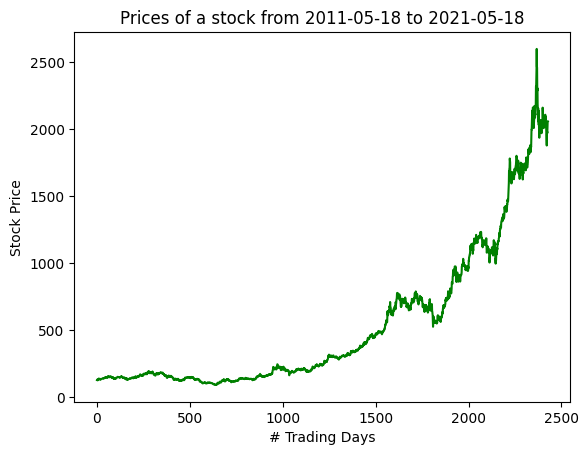

In [6]:
plt.plot(data['close'], color='green') 
plt.title('Prices of a stock from 2011-05-18 to 2021-05-18')
plt.xlabel('# Trading Days')
plt.ylabel('Stock Price') 
plt.show()

### Preprocess the data

##### Compose training data and test data by splitting the loaded data

Let's use data of 9 yeas of trading days  for training, and 1 year of trading days' data for testing.

Assume we have an average of **22 trading days per month**.
   

In [7]:
data.iloc[:,3]

0        125.574
1        128.749
2        129.361
3        126.913
4        125.355
          ...   
2423    1984.000
2424    1971.500
2425    2009.850
2426    2057.960
2427    2059.310
Name: close, Length: 2428, dtype: float64

In [8]:
## Assign the number of records (i.e. trading days) available in the data, to the variable below: 
days_total = data.shape[0]


## Assign the number of trading days of 1 year based on the assumption mentioned above (avg. 22 trading days per month), 
##   to the variable below: 
days_oneYear = 264 

 
## Assign the column index to the variable below:
idx = 3

## data split for training
data_train = data.iloc[0 : days_total-days_oneYear, idx:idx+1].values  

## data split for test
data_test  = data.iloc[days_total-days_oneYear: , idx:idx+1].values   


In [9]:
data_train

array([[ 125.574],
       [ 128.749],
       [ 129.361],
       ...,
       [1165.   ],
       [1162.3  ],
       [1185.1  ]])

In [10]:
## Datatype of `data_train` and `data_test`
print(type(data_train), type(data_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [11]:
## Dimensions of the `data_train` and `data_test`
print(len(data_train), len(data_test))

2164 264


##### Normalizing the data

Now we need to define a scaler to normalize the data for boosting the model performance.


In [12]:
## Create a `scaler` for scaling the data to be between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1)) 

## calculate the `scaler` based on the training data     
scaler.fit(data_train)  

## Apply the `scaler` upon the training data to normalize the values of `data_train` being between 0 and 1  
data_train_scaled = scaler.transform(data_train) 

In [14]:
data_train_scaled

array([[0.03173788],
       [0.03451201],
       [0.03504675],
       ...,
       [0.9399301 ],
       [0.93757099],
       [0.95749235]])

## Build architecture of your RNN model

The basic building block of a neural network is the layer.

You will configure each layer of your model, then compile the model.

<br>
<br>

For this task you are required to chain together layers as the architecture of the RNN:

  [3 types of `RNN layers`](https://www.tensorflow.org/guide/keras/rnn) can be implemented in Keras   

   - [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)
   - [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
   - [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
 

  [the `Dropout` layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) can be used to improve model performance

<br>
<br>
In the end, you will get one output from your model, representing the stock price of the following day, which is predicted based on the sequencial stock prices from the previous days.



##### Stack and Configure layers

In [15]:
# Build a tf.keras.Sequential model by stacking layers as your RNN model

model = keras.Sequential([
    
    layers.SimpleRNN(80, activation='tanh', return_sequences=True),     
    
    layers.Dropout(rate=0.2), 
    
    layers.SimpleRNN(units=100, activation='tanh', return_sequences=True), 
    
    layers.Dropout(rate=0.5),    
    
    layers.SimpleRNN(units=120, activation='tanh', return_sequences=False),  
    
    layers.Dropout(rate=0.5),   
               
    layers.Dense(units=1)      
 
])



2023-07-06 17:43:33.725620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Compile the model

Before the model is ready for training, it needs a few more settings. These are to be added during the [model's compiling](https://www.tensorflow.org/api_docs/python/tf/keras/Model) step:

- [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) : This is how the model is updated based on the data it sees and its loss function.
- [Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) : Used to monitor the training and testing steps.  

In [16]:
my_learn_rate = 0.001
my_optimizer = optimizers.Adam(learning_rate=my_learn_rate)

model.compile(optimizer=my_optimizer,
        loss=keras.losses.MeanSquaredError()
        ) 

## Fit/Train the model

Train the model to fit the training dataset

#### Compose traning dataset out of the data_train

We design and apply **this schema** for stock price forcasting:             
```
Use the stock price of trading days in the past month to predict the stock price of next 1 day.
```      

* In another word, every `22 days` as `timesteps` to be 1 training record/sample, to train for the `1 next day` which serves as the corresponding label.     

The training dataset will be composed by extracting all the qualified records/samples and their corresponding labels, accoridng to the above designed schema, from the previous splitted and processed training data `data_train_scaled`

In [17]:
## Create lists to store extracted training record set and traning label set.
pastDays_trainSet = []
nextDay_trainSet = []

## Assign the number of days used in one training record 
pastDaysRange = 22 

## Loop to Extract all records/samples from `data_train_scaled` to form a training record set,
##   do the same for all corresponding labels to form training label set,
##   Each extraction has `pastDaysRange` days as one record, and 1 next day as label 
for nextDay in range(pastDaysRange, data_train_scaled.size):
    pastDays_trainSet.append(data_train_scaled[nextDay-pastDaysRange : nextDay, 0])
    nextDay_trainSet.append(data_train_scaled[nextDay, 0])

## Convert the set lists to numpy array in order to work with model built in Keras 
pastDays_trainSet, nextDay_trainSet = np.array(pastDays_trainSet), np.array(nextDay_trainSet) 


Check the shape of the extracted record set and label set for training, according to their data type:

In [18]:
## Check the dimensions of the training record set `pastDays_trainSet` and traning label set `nextDay_trainSet`
print(pastDays_trainSet.shape)
print(nextDay_trainSet.shape)

(2142, 22)
(2142,)


##### Reshape the dimension of training record set

Use a function of Numpy to reshape the training record set to satisfy the model accepted format `[#sample, #timesteps, #feature]` 

    * we are using only closing stock price as the training feature

In [19]:
## Reshape `pastDays_trainSet`

pastDays_trainSet = np.reshape(pastDays_trainSet, (-1, pastDaysRange, 1)) 

In [20]:
print(pastDays_trainSet.shape[0])

2142


##### Construct the training dataset 

Create the training dataset `dataset_train` from both the training record set `pastDays_trainSet` and traning label set `nextDay_trainSet`         
Then, Shuffle and Batch the `dataset_train` for the model

In [21]:
## Construct a Tensorflow Dataset as training dataset composed by training record set and training label set.
dataset_train = tf.data.Dataset.from_tensor_slices((pastDays_trainSet, nextDay_trainSet))       
   
    
## Set number of records for the shuffle
train_record_count = pastDays_trainSet.shape[0] 

## Decide a proper value of batch size for your model training 
train_batch_size = 15    

## Randomly shuffle and batch the dataset
dataset_train = dataset_train.shuffle(train_record_count).batch(train_batch_size) 

In [22]:
dataset_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 22, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

#### Train your model
Feed the train dataset to the model and let it  [fit to associate ](https://www.tensorflow.org/api_docs/python/tf/keras/Model)  stock prices of past days and stock price of next day

In [23]:
## Decide a proper value of epoch for your model training 
epochs_count = 25 

## Feed in the training dataset to train model
model.fit(dataset_train, epochs=epochs_count) 
 

Epoch 1/25
143/143 [==============================] - 4s 10ms/step - loss: 0.2946
Epoch 2/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0787
Epoch 3/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0416
Epoch 4/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0246
Epoch 5/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0168
Epoch 6/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0143
Epoch 7/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0119
Epoch 8/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0094
Epoch 9/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0078
Epoch 10/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0063
Epoch 11/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 12/25
143/143 [==============================] - 1s 10ms/step - loss: 0.0051
Epoch 13/25
143/

##### Display the architecture of your model 

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 22, 80)            6560      
                                                                 
 dropout (Dropout)           (None, 22, 80)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 22, 100)           18100     
                                                                 
 dropout_1 (Dropout)         (None, 22, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 120)               26520     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

## Evaluate/Test the trained model

Evaluates your trained model based on the test dataset to see how the model performs, with your different tunning choices, to aim at reaching better performance

#### Compose test dataset out of the `data_test`

Apply the same data processing procedure (that has been applied in creating the `training dataset`) to generate `test dataset`

The procedure would include some following steps:

- You will need to **normalize** the test data by the same scaler calculated on the train data     

- After then, **extract** test records and test labels from previously splitted test data, to get test record set and test label set           

- You will also need to **reshape** the test record set to satisfy the model acceptable dimension, same as which has done for the training record set

- Then **generate** the test dataset composed by test record set and test label set.

- Have the test dataset **batched** for the model evaluation


In [25]:
## Apply also the already calculated scaler to normalize the test data 
data_test_scaled=scaler.transform(data_test)  

## Create lists to store extracted test record set and test label set.
pastDays_testSet=[]
nextDay_testSet=[] 
 
## Loop according to the same schema, to Extract all records/samples from `data_test_scaled` to form a test record set,
##   do the same for all corresponding labels to form test label set,
##   Each extraction has the same `pastDaysRange` days as one record, and 1 next day as label  
for nextDay in range(pastDaysRange, data_test_scaled.size):
    pastDays_testSet.append(data_test_scaled[nextDay-pastDaysRange : nextDay, 0])
    nextDay_testSet.append(data_test_scaled[nextDay, 0])

## Convert the test record and label set from lists datatype to numpy array in order to work with model built in Keras 
pastDays_testSet, nextDay_testSet = np.array(pastDays_testSet), np.array(nextDay_testSet) 

print(pastDays_testSet.shape)


## Use a function of Numpy to reshape the test record set to satisfy the model accepted format `[#sample, #timesteps, #feature]` 
##   we are using only closing stock price as the training feature
pastDays_testSet = np.reshape(pastDays_testSet, (-1, pastDaysRange, 1)) 


(242, 22)


In [26]:
nextDay_testSet.shape[0]

242

In [27]:
## Construct a Tensorflow Dataset as `test dataset` composed by test record set and test label set.  
dataset_test = tf.data.Dataset.from_tensor_slices((pastDays_testSet, nextDay_testSet))   

## Test dataset does not need shuffle, only need to have all in one batch
## Decide a proper value of batch size to have all in one batch 
test_batch_size = nextDay_testSet.shape[0]    

## Batch the test dataset 
dataset_test = dataset_test.batch(test_batch_size)  


##### evaluate your trained model
Feed the obtained test dataset to the model and   [evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model) your model on the test dataset 

In [28]:
## Evaluate model
model.evaluate(dataset_test) 


1/1 [==============================] - 0s 320ms/step - loss: 0.0659


0.06589922308921814

##### Predict stock price on test record data

Feed the test record set to the trained model to   [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model) the stock price in last year (i.e. the 1 year prepared as the test dataset.

In [29]:
## Predict on the test record set to compare with the test label set later 
predicted_stock_prices = model.predict(pastDays_testSet) 


8/8 [==============================] - 0s 4ms/step


##### inverse-scale the forcasted price

Since the predicted prices are all scaled,      
to obtain their values in the original scale for comparison with the real last year stock price,      
we need to inverse scale them. 


In [30]:
## Apply the calculated scaler to inverse-scale the predicted price back to the original actual price scale
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

In [31]:
## Extract the original real stock price from splitted test data and slice to start at the same day of predicted prices
real_stock_prices = data_test[pastDaysRange:]


##### Comparative plot 
Plot the predicted results VS. the real label prices for comparison

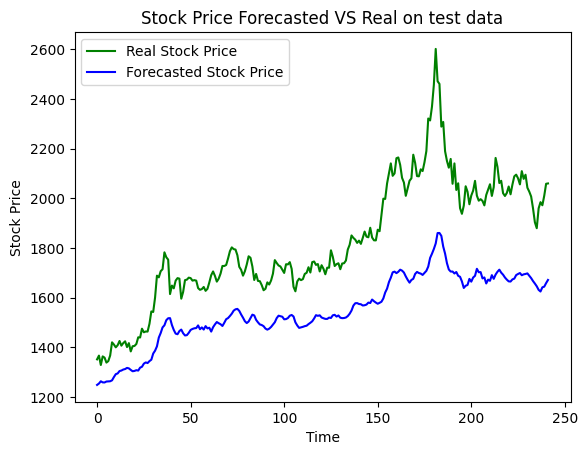

In [32]:
## Plot the comparative chart
plt.plot(real_stock_prices, color='green', label='Real Stock Price')
plt.plot(predicted_stock_prices, color='blue', label='Forecasted Stock Price')
plt.title('Stock Price Forecasted VS Real on test data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()